In [1]:
from pathlib import Path
import pandas as pd

In [2]:
features_path = Path('./data/processed/features')

In [3]:
h18 = pd.read_csv(features_path / 'human2018_longsquares.csv', index_col=0)
h19 = pd.read_csv(features_path / 'human2019_longsquares.csv', index_col=0)
m18 = pd.read_csv(features_path / 'mouse2018_longsquares.csv', index_col=0)
m19 = pd.read_csv(features_path / 'mouse2019_longsquares.csv', index_col=0)
natcom = pd.read_csv(features_path / 'natcom_longsquares.csv', index_col=0)

In [4]:
print(h18.shape)
print(h19.shape)
print(m18.shape)
print(m19.shape)
print(natcom.shape)

(18, 26)
(47, 26)
(5, 26)
(7, 26)
(84, 26)


In [5]:
all_meta = pd.read_csv('./data/processed/meta/all_meta_cleaned.csv')

In [6]:
all_meta.head()

,ABF File,Data Type,expt_date,layer_name,RMP,subject_id,sex,age,seizure_duration_years,resection_location,drugs,Cell #,ZD status,internal_soln,external_soln,aggregated_cell_layer,diagnosis_Epilepsy,diagnosis_Tumor,is_epileptogenic,cutting_solution
0,13n05011,Human,2013-11-05,L5,-54.937742,X2013.11.05,M,57.0,45.0,Right-ATL,"LSC, CZP, CBZ",1,n.a,Potassium gluconate,aCSF,L5,True,False,False,NaN
1,13n21007,Human,2013-11-21,L5,-59.158322,X2013.11.21,M,27.0,11.0,Right-ATL,"LSC, LRZ, CLB",1,n.a,Potassium gluconate,aCSF,L5,True,False,False,NaN
2,13d02004,Human,2013-12-02,L5,-59.069821,X2013.12.02,F,39.0,11.0,Right-ATL,"LSC, LRZ, LEV",1,n.a,Potassium gluconate,aCSF,L5,False,True,False,NaN
3,13d02022,Human,2013-12-02,L5,-64.428708,X2013.12.02,F,39.0,11.0,Right-ATL,"LSC, LRZ, LEV",1,n.a,Potassium gluconate,aCSF,L5,False,True,False,NaN
4,13d02049,Human,2013-12-02,L5,-57.000000,X2013.12.02,F,39.0,11.0,Right-ATL,"LSC, LRZ, LEV",1,n.a,Potassium gluconate,aCSF,L5,False,True,False,NaN


In [7]:
all_meta.aggregated_cell_layer.value_counts()

L5     146
L23     63
L3C     25
Int      1
Name: aggregated_cell_layer, dtype: int64

In [8]:
all_meta.shape

(235, 20)

In [9]:
cols_to_select = ['Data Type', 'expt_date', 'layer_name', 'RMP', 'subject_id','sex', 
                  'age', 'seizure_duration_years', 'diagnosis_Epilepsy', 'diagnosis_Tumor', 'resection_location', 'drugs', 'Cell #', 
                  'ZD status']

## find overlap of NatCom data with other human data

In [10]:
h19.head()

,adapt,avg_rate,first_isi,isi_cv,latency,mean_isi,median_isi,stim_amp,threshold_v,peak_v,...,fast_trough_t,trough_t,rheo_first_isi,v_baseline,rheobase_i,fi_fit_slope,sag,vm_for_sag,input_resistance,tau
19122003.nwb,0.064074,16.672224,0.0339,0.273391,0.0193,0.064178,0.0634,100.830078,-44.342945,27.709057,...,0.2459,0.2708,0.0812,-68.923630,50.048824,0.027667,0.029006,-97.321457,246.806845,0.017229
19122026.nwb,0.147376,13.337779,0.0135,0.372434,0.0220,0.080443,0.0861,99.487305,-46.290920,30.750710,...,0.2647,0.2650,0.0171,-60.726688,50.537109,-0.027519,0.077051,-102.656883,174.053371,0.017483
19128006.nwb,0.167628,8.334722,0.0617,0.335561,0.0551,0.125575,0.1341,199.951172,-41.866920,53.729397,...,0.2932,0.3320,0.1430,-65.453194,150.634766,0.056708,0.098792,-90.740829,69.612592,0.019236
19128040.nwb,0.155573,8.338893,0.0366,0.357272,0.0172,0.062950,0.0606,150.512695,-48.840191,37.646633,...,0.2198,0.2198,0.0610,-67.906494,100.952148,-0.028572,0.010225,-101.818710,132.281557,0.019539
19128061.nwb,0.417120,6.667778,0.0518,0.646497,0.0431,0.164267,0.1343,250.366196,-45.058720,54.749027,...,0.2612,0.3186,0.1079,-65.821449,200.317383,0.050068,0.162671,-85.341927,56.034490,0.017413


In [11]:
natcom.head()

,adapt,avg_rate,first_isi,isi_cv,latency,mean_isi,median_isi,stim_amp,threshold_v,peak_v,...,fast_trough_t,trough_t,rheo_first_isi,v_baseline,rheobase_i,fi_fit_slope,sag,vm_for_sag,input_resistance,tau
15o08032.nwb,0.025671,12.254771,0.045904,0.185785,0.024992,0.078591,0.085178,150.000000,-46.544189,51.179199,...,0.476385,0.517801,0.063552,-59.161621,100.000000,0.024064,0.080064,-80.827637,51.609583,0.012116
2016_03_03_0103.nwb,0.158713,11.111593,0.013561,0.468069,0.073623,0.084861,0.103924,249.999985,-37.310596,50.152786,...,0.392656,0.393016,0.015541,-65.452423,200.000000,0.037880,0.097288,-84.393112,43.874104,0.017017
2016_02_29_0065.nwb,-0.002228,29.167931,0.040622,0.090739,0.023041,0.032983,0.033031,100.000000,-39.903942,38.625420,...,0.300432,0.301692,0.072363,-63.777344,50.000000,0.175765,0.167399,-98.093346,213.170767,0.028196
19320017.nwb,0.232653,6.667778,0.061800,0.372042,0.063800,0.107767,0.102000,150.024414,-33.044117,41.464554,...,0.566500,0.647600,NaN,-73.134575,99.487305,0.059596,0.025747,-98.031296,94.525866,0.012607
19320001.nwb,0.307538,8.337502,0.018900,0.531679,0.052800,0.100975,0.115450,148.803711,-39.222244,53.749565,...,0.298800,0.299000,0.030500,-64.493660,99.975586,0.066464,0.109240,-101.981644,84.223703,0.015239


In [12]:
# there are overlapping files from human19 dataset and the natcoms data
# drop them from h19
h19 = h19[~h19.index.isin(natcom.index)]

In [13]:
h19.shape

(27, 26)

## Concatenate the full human tables

In [14]:
natcom.shape

(84, 26)

In [15]:
ephys_feats = pd.concat([h18 , h19, natcom, m18, m19])

In [16]:
ephys_feats.index = ephys_feats.index.str.rstrip('.nwb')

In [17]:
ephys_feats.shape

(141, 26)

In [18]:
results_df = ephys_feats.merge(all_meta, left_index=True, right_on='ABF File').set_index('ABF File')
results_df.index.name = 'file_id'

In [19]:
results_df.shape

(141, 45)

In [20]:
results_df.columns

Index(['adapt', 'avg_rate', 'first_isi', 'isi_cv', 'latency', 'mean_isi',
       'median_isi', 'stim_amp', 'threshold_v', 'peak_v', 'trough_v',
       'fast_trough_v', 'adp_v', 'width', 'upstroke_downstroke_ratio',
       'peak_t', 'fast_trough_t', 'trough_t', 'rheo_first_isi', 'v_baseline',
       'rheobase_i', 'fi_fit_slope', 'sag', 'vm_for_sag', 'input_resistance',
       'tau', 'Data Type', 'expt_date', 'layer_name', 'RMP', 'subject_id',
       'sex', 'age', 'seizure_duration_years', 'resection_location', 'drugs',
       'Cell #', 'ZD status', 'internal_soln', 'external_soln',
       'aggregated_cell_layer', 'diagnosis_Epilepsy', 'diagnosis_Tumor',
       'is_epileptogenic', 'cutting_solution'],
      dtype='object')

# Plotting for basic QC

In [21]:
import matplotlib.pyplot as plt

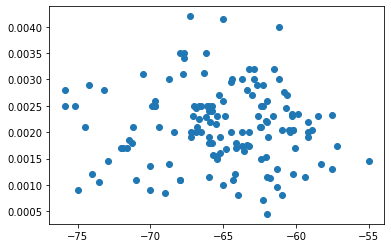

In [22]:
plt.scatter(x=results_df.RMP, y=results_df.width)

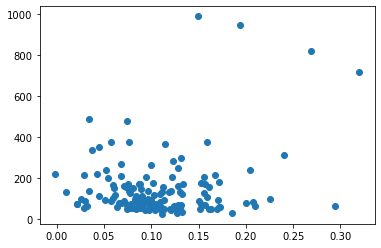

In [23]:
plt.scatter(x=results_df.sag, y=results_df.input_resistance)

In [24]:
results_df['AHP'] = results_df.threshold_v - results_df.fast_trough_v

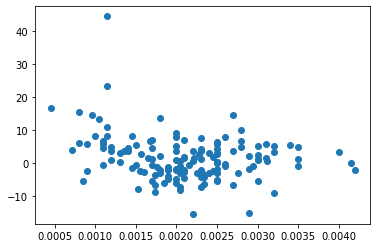

In [25]:
plt.scatter(x=results_df.width, y=results_df.AHP)

In [26]:
results_df.shape

(141, 46)

In [27]:
putative_int_ids = ['2019_11_04_0083', '2019_11_28_0119', '18320021', '18118024']
putative_interneurons = results_df.loc[putative_int_ids]

In [28]:
results_df['putative_interneuron'] = results_df.index.isin(putative_int_ids)

In [29]:
putative_interneurons.to_csv('./data/processed/features/putative_interneurons.csv')

In [30]:
putative_interneurons

,adapt,avg_rate,first_isi,isi_cv,latency,mean_isi,median_isi,stim_amp,threshold_v,peak_v,...,Cell #,ZD status,internal_soln,external_soln,aggregated_cell_layer,diagnosis_Epilepsy,diagnosis_Tumor,is_epileptogenic,cutting_solution,AHP
file_id,,,,,,,,,,,,,,,,,,,,,
2019_11_04_0083,0.003991,48.337361,0.01850,0.050683,0.00855,0.021037,0.021350,200.000000,-39.520264,12.054443,...,C2,n.a,Potassium gluconate,Synaptic Blockers,L3C,True,False,False,Sucrose,16.510010
2019_11_28_0119,0.007295,50.004167,0.01505,0.093326,0.00515,0.018186,0.018100,150.000000,-43.823242,20.111084,...,1,n.a,Potassium gluconate,aCSF,L5,True,False,False,Sucrose,15.533443
18320021,0.003841,36.043252,0.02310,0.065675,0.01190,0.027734,0.028200,100.341797,-53.855473,-16.318848,...,C3,n.a,Potassium gluconate,Synaptic Blockers,L23,False,True,False,NMDG,13.732906
18118024,0.009277,21.001050,0.01855,0.108196,0.00780,0.024880,0.024675,150.390625,-33.550194,113.086777,...,C4,n.a,Potassium gluconate,Synaptic Blockers,L5,NaN,NaN,False,NMDG,44.433594


In [31]:
results_df.to_csv('./data/processed/features/all_features_wide.csv')

In [32]:
results_df.resection_location.value_counts()

Left-ATL         64
Right-ATL        49
Parietal lobe     8
Right-FL          8
Name: resection_location, dtype: int64

In [33]:
results_df.columns

Index(['adapt', 'avg_rate', 'first_isi', 'isi_cv', 'latency', 'mean_isi',
       'median_isi', 'stim_amp', 'threshold_v', 'peak_v', 'trough_v',
       'fast_trough_v', 'adp_v', 'width', 'upstroke_downstroke_ratio',
       'peak_t', 'fast_trough_t', 'trough_t', 'rheo_first_isi', 'v_baseline',
       'rheobase_i', 'fi_fit_slope', 'sag', 'vm_for_sag', 'input_resistance',
       'tau', 'Data Type', 'expt_date', 'layer_name', 'RMP', 'subject_id',
       'sex', 'age', 'seizure_duration_years', 'resection_location', 'drugs',
       'Cell #', 'ZD status', 'internal_soln', 'external_soln',
       'aggregated_cell_layer', 'diagnosis_Epilepsy', 'diagnosis_Tumor',
       'is_epileptogenic', 'cutting_solution', 'AHP', 'putative_interneuron'],
      dtype='object')

In [34]:
results_df[results_df.subject_id == '1908']

,adapt,avg_rate,first_isi,isi_cv,latency,mean_isi,median_isi,stim_amp,threshold_v,peak_v,...,ZD status,internal_soln,external_soln,aggregated_cell_layer,diagnosis_Epilepsy,diagnosis_Tumor,is_epileptogenic,cutting_solution,AHP,putative_interneuron
file_id,,,,,,,,,,,,,,,,,,,,,
19320022,0.230162,8.334722,0.0346,0.499508,0.0354,0.080725,0.07355,200.195297,-45.418678,50.559109,...,n.a,Potassium gluconate,Synaptic Blockers,L23,True,False,True,Sucrose,2.929688,False


In [35]:
results_df

,adapt,avg_rate,first_isi,isi_cv,latency,mean_isi,median_isi,stim_amp,threshold_v,peak_v,...,ZD status,internal_soln,external_soln,aggregated_cell_layer,diagnosis_Epilepsy,diagnosis_Tumor,is_epileptogenic,cutting_solution,AHP,putative_interneuron
file_id,,,,,,,,,,,,,,,,,,,,,
18329051,0.081030,9.005403,0.06420,0.333812,0.02840,0.117163,0.10835,160.522461,-48.808891,43.659378,...,n.a,Potassium gluconate,Synaptic Blockers,L23,True,False,False,NMDG,6.408691,False
18329044,0.117396,3.003604,0.19660,0.117396,0.03340,0.222750,0.22275,79.956055,-64.471191,11.212403,...,n.a,Potassium gluconate,Synaptic Blockers,Int,True,False,False,NMDG,2.746582,False
18o22020,0.182035,9.001800,0.01010,0.661551,0.02750,0.120750,0.15595,119.750969,-42.872929,36.762695,...,n.a,Potassium gluconate,Synaptic Blockers,L23,False,True,False,Sucrose,1.022339,False
18129004,0.050688,17.068273,0.01900,0.375272,0.01520,0.058944,0.05905,101.318359,-51.379692,29.797071,...,n.a,Potassium gluconate,Synaptic Blockers,L5,True,False,False,NMDG,1.831055,False
18426010,0.051574,11.013216,0.04550,0.228869,0.04970,0.091170,0.09915,80.322266,-33.305374,49.092091,...,n.a,Potassium gluconate,Synaptic Blockers,L23,True,False,False,NMDG,14.648438,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19o23010,0.023962,16.668056,0.04875,0.097611,0.02325,0.062678,0.06335,250.000000,-37.170410,17.089844,...,n.a,Potassium gluconate,Synaptic Blockers,L5,NaN,NaN,False,Sucrose,13.458252,False
19o23039,0.029927,16.668056,0.04125,0.128442,0.04085,0.060044,0.06255,150.000000,-48.217773,32.928467,...,n.a,Potassium gluconate,Synaptic Blockers,L5,NaN,NaN,False,Sucrose,1.190186,False
19o22018,0.021133,28.335695,0.02095,0.139971,0.02690,0.035416,0.03635,150.000000,-36.224365,32.867432,...,Before ZD,Potassium gluconate,Synaptic Blockers,L5,NaN,NaN,False,Sucrose,5.828857,False


In [36]:
epileptogenic_cell_ids = ['20140127_600_1_0118', '20140127_600_1_0158', '15622000',
                     '15622005', '15622013', '15622015', '15622019', '15723013']

results_df[results_df.index.isin(epileptogenic_cell_ids)]

,adapt,avg_rate,first_isi,isi_cv,latency,mean_isi,median_isi,stim_amp,threshold_v,peak_v,...,ZD status,internal_soln,external_soln,aggregated_cell_layer,diagnosis_Epilepsy,diagnosis_Tumor,is_epileptogenic,cutting_solution,AHP,putative_interneuron
file_id,,,,,,,,,,,,,,,,,,,,,


In [37]:
#sex, age, treatment, tumor vs epilepsy, layer, class of cell?, morphology?
#include external solutions
tidydf = results_df.reset_index().melt(id_vars=['file_id', 'Data Type' ,'layer_name', 'aggregated_cell_layer', 'sex', 'age', 
                                             'internal_soln', 'external_soln', 'seizure_duration_years', 
                                             'diagnosis_Epilepsy', 'diagnosis_Tumor', 'resection_location', 
                                             'cutting_solution', 'is_epileptogenic'], 
                                    value_vars=['RMP', 'adapt', 'avg_rate', 'first_isi', 'isi_cv', 'latency', 'mean_isi', 
                                                'median_isi','stim_amp', 'threshold_v', 'peak_v', 'trough_v', 
                                                'fast_trough_v', 'adp_v', 'width', 'upstroke_downstroke_ratio', 
                                                'peak_t', 'fast_trough_t', 'trough_t', 'rheo_first_isi', 'v_baseline',
                                                'rheobase_i', 'fi_fit_slope', 'sag', 'vm_for_sag', 'input_resistance',
                                                'tau', 'AHP'], 
                                    var_name='feature')

In [38]:
tidydf.head()

,file_id,Data Type,layer_name,aggregated_cell_layer,sex,age,internal_soln,external_soln,seizure_duration_years,diagnosis_Epilepsy,diagnosis_Tumor,resection_location,cutting_solution,is_epileptogenic,feature,value
0,18329051,Human,L23,L23,F,22.0,Potassium gluconate,Synaptic Blockers,12.0,True,False,Left-ATL,NMDG,False,RMP,-69.7
1,18329044,Human,L23-Int,Int,F,22.0,Potassium gluconate,Synaptic Blockers,12.0,True,False,Left-ATL,NMDG,False,RMP,-69.7
2,18o22020,Human,L23,L23,F,40.0,Potassium gluconate,Synaptic Blockers,10.0,False,True,Right-ATL,Sucrose,False,RMP,-68.4
3,18129004,Human,L5,L5,M,30.0,Potassium gluconate,Synaptic Blockers,4.0,True,False,Right-ATL,NMDG,False,RMP,-71.2
4,18426010,Human,L23,L23,M,29.0,Potassium gluconate,Synaptic Blockers,28.0,True,False,Left-ATL,NMDG,False,RMP,-65.3


In [39]:
tidydf.to_csv('./data/processed/features/tidyfeatures.csv', index=None)

# Summarizing the dataset for table 1

In [40]:
human_summary = discarded_ir_outliers[discarded_ir_outliers['Data Type'] == 'Human']
mouse_summary = discarded_ir_outliers[discarded_ir_outliers['Data Type'] == 'Mouse']

NameError: name 'discarded_ir_outliers' is not defined

In [ ]:
human_summary

In [ ]:
human_summary.iloc[0]

In [ ]:
human_summary.external_soln.value_counts()

In [ ]:
human_summary_blockers = human_summary[human_summary.external_soln == 'Synaptic Blockers']
human_summary_acsf = human_summary[human_summary.external_soln == 'aCSF']

In [ ]:
human_summary_acsf.layer_name.value_counts()

In [ ]:
human_summary_acsf.loc[:, ['subject_id', 'Cell #']].groupby('subject_id').nunique()#.shape#

In [ ]:
human_summary_acsf.loc[:, ['subject_id', 'layer_name', 'Cell #']].groupby('layer_name').count()#nunique()#.shape#

In [ ]:
human_summary_acsf.loc[:, ['subject_id', 'layer_name', 'Cell #']].groupby('layer_name').nunique()#nunique()#.shape#

In [ ]:
human_summary_acsf.loc[:, ['subject_id', 'Cell #']].groupby('subject_id').nunique().sum()

In [ ]:
human_summary_blockers.loc[:, ['subject_id', 'Cell #']].groupby('subject_id').nunique().sum()

In [ ]:
human_summary_blockers.loc[:, ['subject_id', 'Cell #']].groupby('subject_id').nunique().shape#

In [ ]:
human_summary['ZD status'].value_counts()

In [ ]:
human_summary.loc[:, ['subject_id', 'Cell #']].groupby('subject_id').nunique().sum()#.shape#

In [ ]:
mouse_summary

In [ ]:
mouse_summary.iloc[0]

In [ ]:
mouse_summary.external_soln.value_counts()

In [ ]:
mouse_summary.loc[:, ['subject_id', 'Cell #']].groupby('subject_id').nunique()

In [ ]:
mouse_summary.expt_date.value_counts().sort_index()

In [ ]:
mouse_summary.loc[:, ['expt_date', 'Cell #']].groupby('expt_date').nunique()

In [ ]:
mouse_summary['Cell #'].value_counts()

In [ ]:
mouse_summary.iloc[0]